<a href="https://colab.research.google.com/github/sharath0899/hds5210/blob/main/week10_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [ ]:
data.shape

(3864, 19)

In [ ]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [ ]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

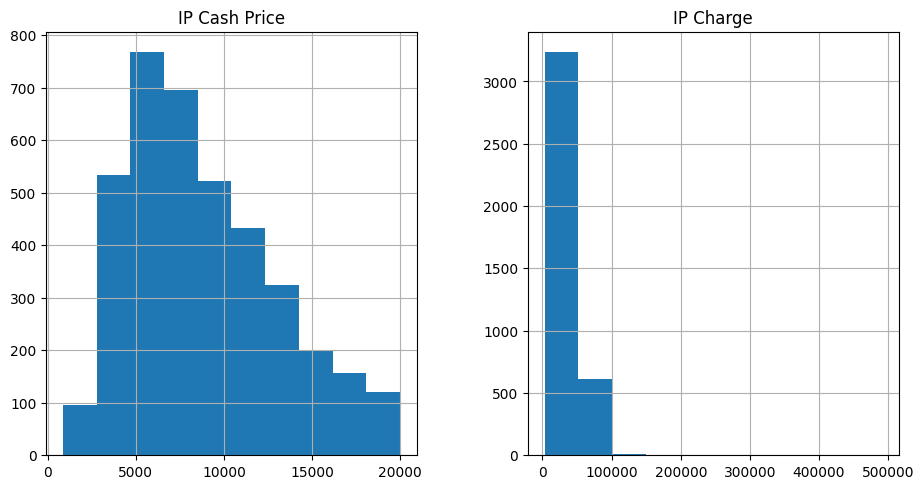

In [ ]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

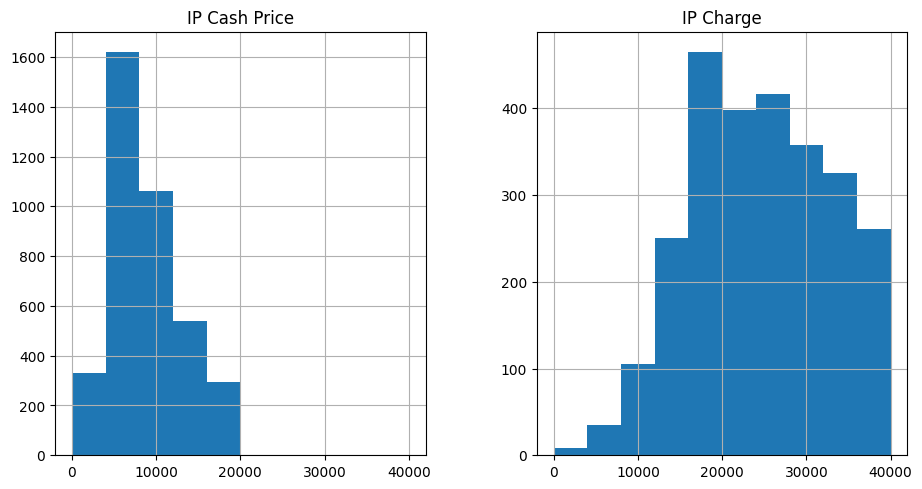

In [ ]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [ ]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:

Histograms of IP Cash Price and IP Charge show several important patterns:

Right-Skewed Distribution:
Both IP Cash Price and IP Charge have distributions that are right-skewed, meaning most values are clustered on the lower end, with a small number of high values extending the distribution. This skew is typical in healthcare pricing, where many common procedures are relatively low-cost, but a few specialized or intensive procedures are priced much higher.

IP Cash Price Concentration:
The IP Cash Price histogram shows that most cash prices are below 20,000, reflecting the initial data filter. The frequency drops off quickly as prices increase, indicating that only a few procedures fall in the higher cash price range.

Broader Range for IP Charge:
The IP Charge histogram displays a wider spread than IP Cash Price, suggesting that charges vary more significantly across procedures. This could be due to institutional billing practices, differences in procedure complexity, or other factors affecting the full billed amount.

Cash Price vs. Charge:
Comparing IP Cash Price and IP Charge shows that cash prices are generally lower than billed charges, possibly because cash prices are intended for out-of-pocket payments and may be reduced compared to the full charge listed for insurance purposes.


---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

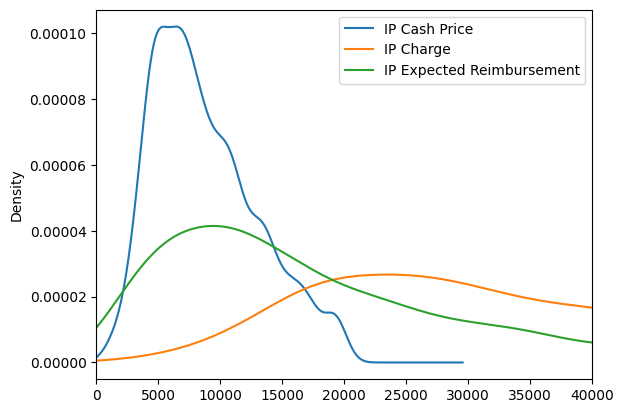

In [ ]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:
In healthcare billing systems there are three pricing tiers; IP Cash Price; IP Charge; and IP Expected Reimbursement—each, with its specific role and function.

The IP cash price refers to the sum that a patient would pay upfront without insurance coverage at a hospital, for healthcare services not included in their insurance plan or for individuals without insurance altogether. Hospitals typically set this price lower to ensure accessibility for those in need of care but lack insurance coverage or for services not covered by their insurance policy. It serves as a cost choice for patients making, out of pocket payments providing assistance to individuals or those facing coverage exclusions in obtaining necessary medical treatment.
The IP Charge represents the amount that the hospital can bill an insurance provider, for services rendered to a patient during their stay at the facility.It is intentionally set at a level to kickstart negotiations with insurance companies.Although insurers typically do not pay the IP Charge due, to agreed upon discounts a substantial charge empowers hospitals during negotiations and optimizes potential payment when discussing rates with insurers.
Projected Reimbursable Amount; Hospitals rely on this figure as the expected payment, from insurance providers as per their agreed contracts. Although less than the charge amount incurred by hospitals for services rendered this projected sum offers an income stream due to the assurance of specific agreements, with insurers. This anticipated payment aids hospitals in predicting revenue and maintaining stability with certainty.
In healthcare pricing strategy; the cash price helps uninsured patients afford treatment; the charge and reimbursement rates maintain hospitals financial stability by setting billing rates and ensuring income, from negotiated insurance payments; this approach allows healthcare providers to cater to various patient groups while maximizing revenue opportunities.



---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [ ]:
data['Payer'].value_counts()

,count
Payer,
ALLWELL [15100],650
ARKANSAS TOTAL CARE [40700],650
AETNA [65000],641
AR BLUE CROSS BLUE SHIELD [25001],641
HEALTHSCOPE [95700],641
MULTIPLAN,641


In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

,IP Expected Reimbursement
Payer,
AETNA [65000],372
ALLWELL [15100],519
AR BLUE CROSS BLUE SHIELD [25001],450
ARKANSAS TOTAL CARE [40700],404
HEALTHSCOPE [95700],641
MULTIPLAN,641


,IP Expected Reimbursement
Payer,
AETNA [65000],"Axes(0.125,0.11;0.775x0.77)"
ALLWELL [15100],"Axes(0.125,0.11;0.775x0.77)"
AR BLUE CROSS BLUE SHIELD [25001],"Axes(0.125,0.11;0.775x0.77)"
ARKANSAS TOTAL CARE [40700],"Axes(0.125,0.11;0.775x0.77)"
HEALTHSCOPE [95700],"Axes(0.125,0.11;0.775x0.77)"
MULTIPLAN,"Axes(0.125,0.11;0.775x0.77)"


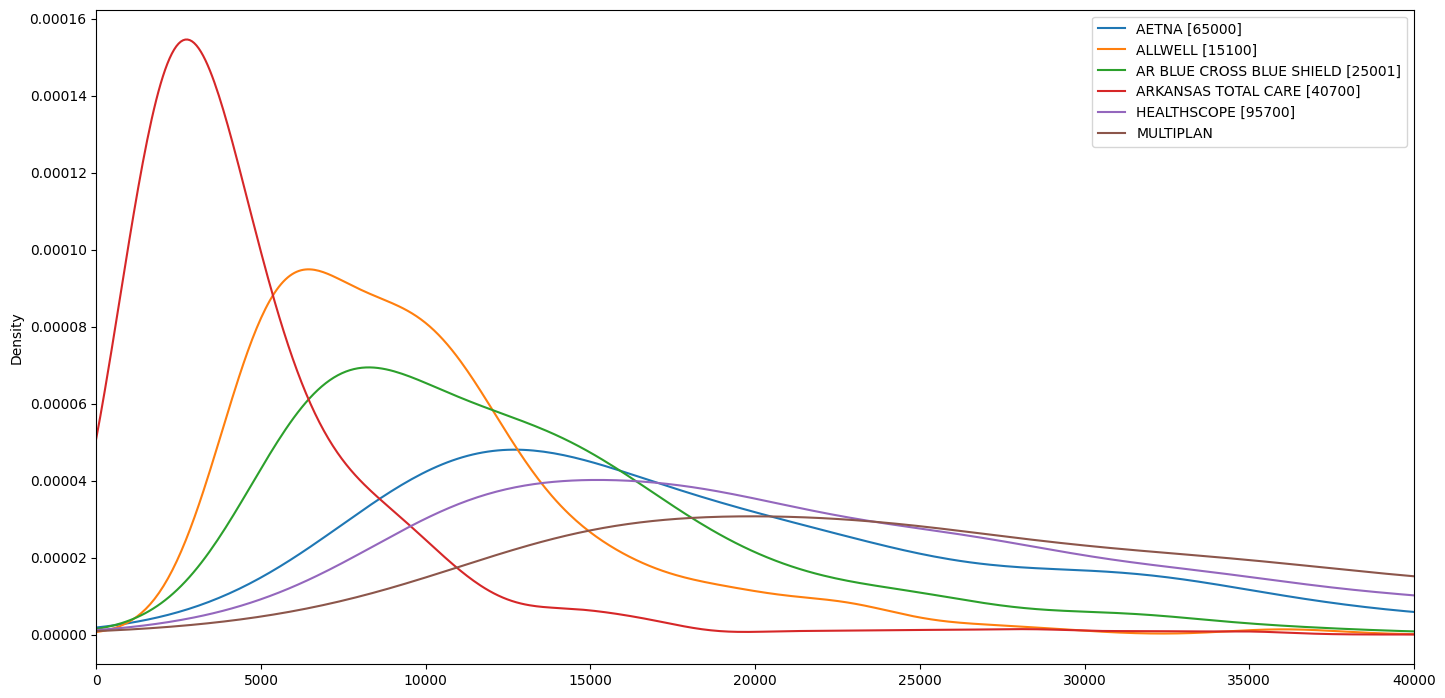

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:

The KDE plot illustrating the anticipated reimbursement, by payers reveals patterns.

Disparities, in Reimbursement Rates Across Various Insurers;
On the KDE plot chart, for each payers line showcases the range of reimbursement sums they offer. A peak that leans more towards the left indicates that the majority of reimbursements from that payer are lower, in value compared to a peak leaning towards the side suggesting typical reimbursement amounts.

Inadequate Compensation Trends;
Some insurers show a trend of reimbursements that lean towards the side of the scale graphically speaking This suggests that they may have stricter reimbursement policies or have haggled for lower rates, with healthcare service providers Consequently leading to reduced payments, for similar services when compared to other insurance companies

Different trends, in increased compensation rates;
Payors located towards the side of the KDE plot tend to receive average reimbursements compared to others.This implies that these payors could have policies or negotiate higher rates, with hospitals resulting in greater compensation, for similar services provided.

Exploring the Concept of Generosity;
Healthcare providers often prefer plans, with a curve leaning towards the right (with peaks to the right) as they usually result in higher reimbursements for services rendered by the providers themselves. On the hand plans that peak, towards the left may impose cost constraints affecting the amount of revenue hospitals receive from these particular payers.
Exploring the Landscape of Reimbursement Policies
Various patterns indicate variations, in how payers approach reimbursement strategies.

When it comes to choosing between cost generous plans, for paying healthcare expenses payers with peaks shifted towards the left tend to prioritize saving money by offering reimbursements for many services. This could indicate that these plans have coverage or stringent rules on what costs are eligible, for reimbursement.
The effect of Provider Revenue is influenced by plans that show reimbursement levels indicated by peaks to the right, in the graph. Typically favored by hospitals as they contribute more to hospital earnings, for services rendered.



---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

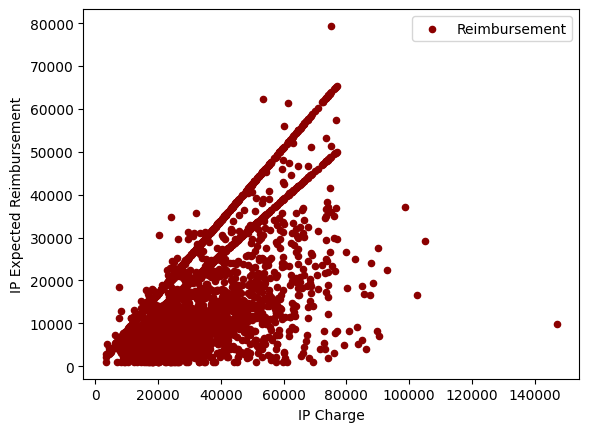

In [ ]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

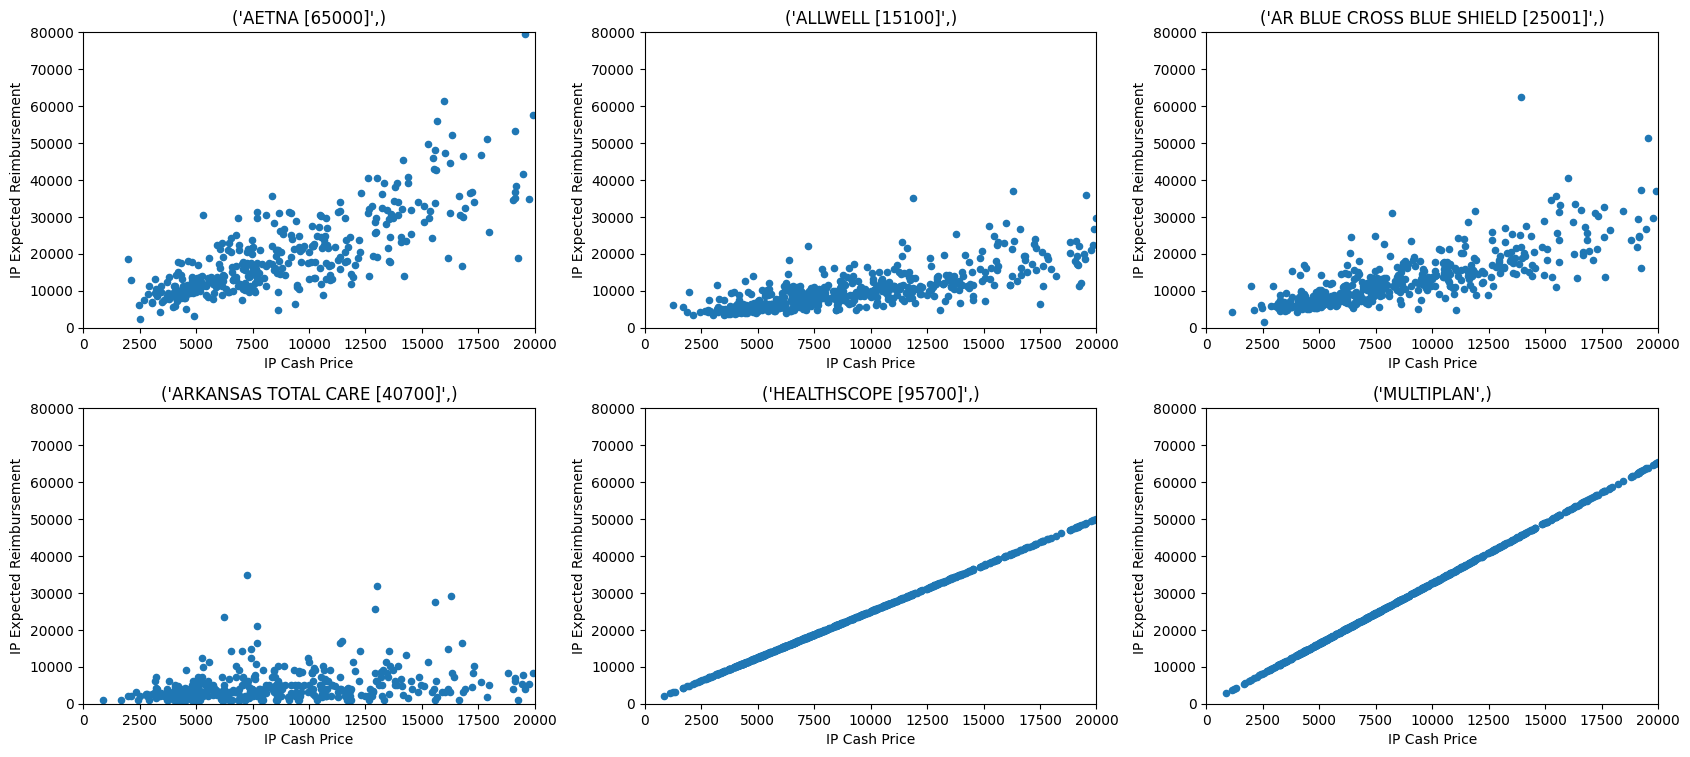

In [ ]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:
Overall Correlation:
In analyzing the correlation, between IP Charge and IP Expected Reimbursement amounts over time I noticed an pattern where higher IP charges correspond to increased expected reimbursements as well; although it’s worth noting that the relationship is not always linear or precise  especially, with lower charge values.

Variations Among Those Who Pay;
The connection, between Aetna and AR Blue Cross Blue Shield appears to be less consistent when comparing IP Cash Price to IP Expected Reimbursement for these payers than others in the data set  indicating that similar cash prices can result in a variety of reimbursement amounts, for them.

Healthscope and Multiplan demonstrate an direct correlation, between the Cash Price for services and the Expected Reimbursement for those services indicating a consistent link, between their reimbursements and the cash prices charged.
Arkansas Total Care and Allwell exhibit a trend, in their payment patterns compared to other insurers. Suggesting a looser connection, between the upfront cash price and the anticipated reimbursement amount. This implies that despite having cash prices  the reimbursements they offer can differ significantly.

Key Points;
Healthcare providers such, as Healthscope and Multiplan can anticipate reimbursement amounts by aligning them with the cash price in a manner.
Some companies such, as Aetna and Arkansas Total Care do not have reimbursement patterns; their reimbursements may fluctuate when cash prices are similar.  


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [ ]:
import pandas as pd

# Load data
data = pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks.csv')

# Quick look at data structure
data.head()


,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


<ipython-input-15-353b662f9819>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_data['Time Period Start Date'] = pd.to_datetime(national_data['Time Period Start Date'])


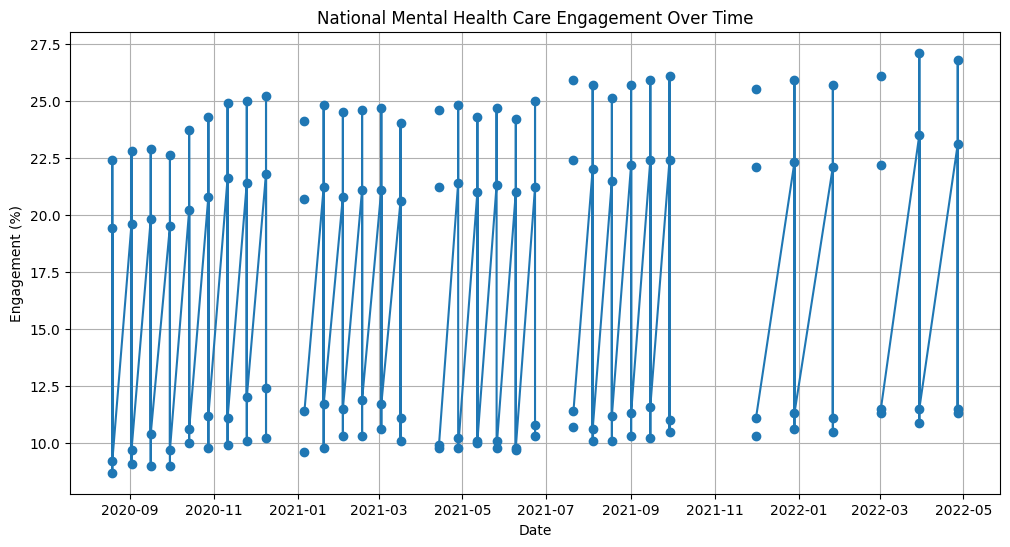

In [ ]:
import matplotlib.pyplot as plt

# Filter for national data over time
national_data = data[(data['Group'] == 'National Estimate') & (data['State'] == 'United States')]
national_data['Time Period Start Date'] = pd.to_datetime(national_data['Time Period Start Date'])

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(national_data['Time Period Start Date'], national_data['Value'], marker='o')
plt.title("National Mental Health Care Engagement Over Time")
plt.xlabel("Date")
plt.ylabel("Engagement (%)")
plt.grid()
plt.show()

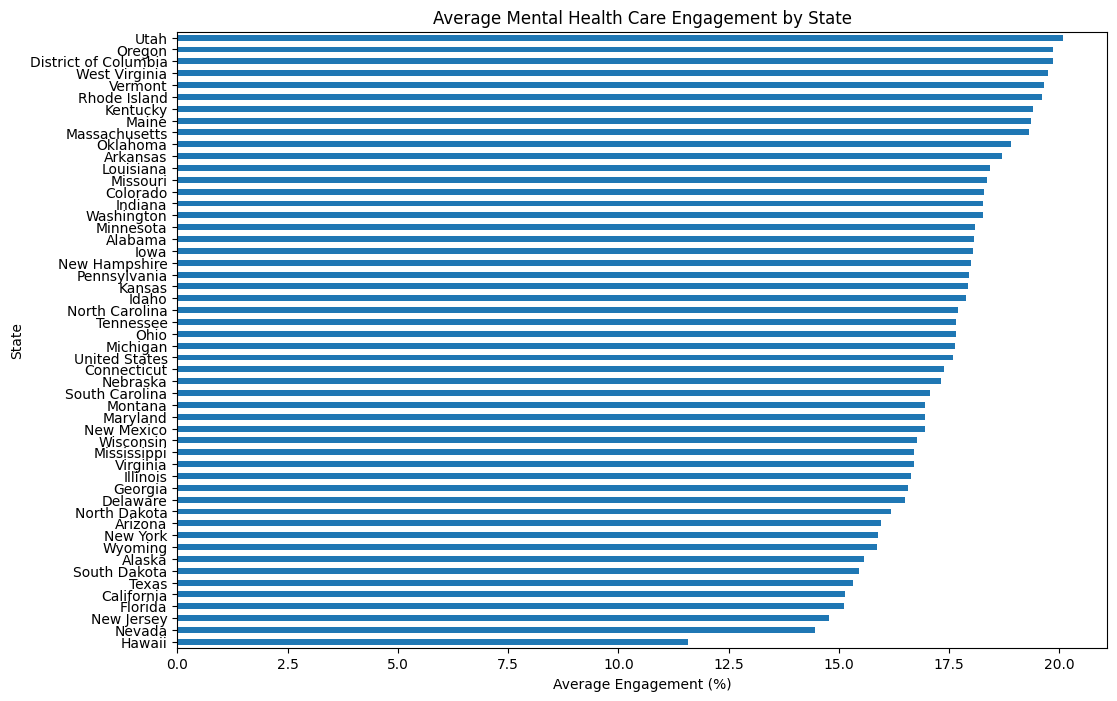

In [ ]:
# Average engagement by state
state_avg = data.groupby('State')['Value'].mean().dropna().sort_values()

# Bar plot
plt.figure(figsize=(12, 8))
state_avg.plot(kind='barh')
plt.title("Average Mental Health Care Engagement by State")
plt.xlabel("Average Engagement (%)")
plt.ylabel("State")
plt.show()

### Observations #1

National Trend Evolution Throughout the Years;

The graph displaying the involvement, in health care activities like medication usage or counseling sessions over periods illustrates the variations in demand and participation levels over time. Keep an eye out for any patterns or changes that might align with occurrences such as phases of the pandemic or shifts in policies.
For example; If you notice a rise in numbers on the graph it could indicate a growing requirement for health support, during times.

Lets compare the states.
The chart showing the involvement, in health care services by state illustrates variations in engagement levels among different areas of the country. States with averages may suggest improved availability of health resources or greater demand.

For services; whereas lower averages might point to regions where mental health support is underutilized or less readily available.



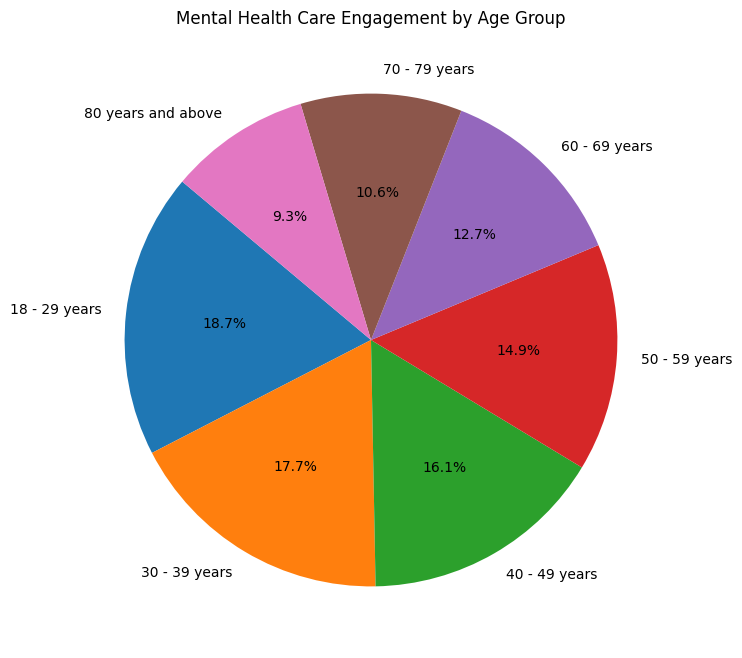

In [ ]:
# More code here to do a second visualization...
# Filter for data by age group (excluding 'National Estimate' and 'By State' for more specific insight)
age_group_data = data[data['Group'] == 'By Age'].groupby('Subgroup')['Value'].mean().dropna()

# Pie chart of engagement by age group
plt.figure(figsize=(8, 8))
age_group_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Mental Health Care Engagement by Age Group")
plt.ylabel("")  # Hide the y-label for cleaner look
plt.show()

### Observations #2

Involvement of Different Age Groups;
The graph illustrates the distribution of participation, in health care among age groups.A larger portion allocated to age groups suggests a level of engagement in mental health care activities within that demographic segment.For instance younger age groups may exhibit involvement indicating heightened awareness or requirement, for mental health assistance.
This analysis delves into the trends related to time and demographics in the use of health services to provide insights, into the timing and individuals inclined towards seeking mental health support.





---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option